Q-1. Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.
Dataset:- https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach This is the Dataset You can use this dataset for this question.

In [1]:
# Importing required packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("instagram_reach.csv")  # Reading our dataset

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [3]:
dataset = pd.read_csv("instagram_reach.csv")        # Storing data into dataset variable

In [4]:
dataset.head()  # Top 5 records of the dataset

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [5]:
dataset.shape       # Checking size of the dataset

(100, 8)

In [6]:
dataset.drop(columns = ['Unnamed: 0','S.No'], inplace = True) # Droping column which is not required.

In [7]:
dataset

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [8]:
dataset.isnull().sum()      # Checking Missing Value.

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

- ### Their are missing value in caption column.

In [9]:
dataset.dtypes      # Checking datatype of the features.

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [10]:
dataset.head()  # Top 5 records of the dataset

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [11]:
dataset['Time since posted'].unique()   # Checking Unique values in Time since posted column

array(['11 hours', '2 hours', '3 hours', '4 hours', '7 hours', '8 hours',
       '9 hours', '5 hours', '20 hours', '14 hours', '24 hours'],
      dtype=object)

In [12]:
dataset['Time since posted'].dtype  # Checking datatype of Time since posted feature

dtype('O')

In [13]:
dataset['Time since posted'] = dataset['Time since posted'].str.split(' ').str[0]    # In Time since posted column,their is word 'hours' we will remove it. 

In [14]:
dataset['Time since posted'] = dataset['Time since posted'].astype(int) # changing datatype of Time since posted feature

In [15]:
dataset.dtypes      # Checking datatype of the features.

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int32
Likes                 int64
dtype: object

In [16]:
dataset.head()  # Top 5 records of the dataset

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


### Numerical features

In [17]:
numerical_features = []
for i in dataset.columns:
    if dataset[i].dtype != 'object':
        numerical_features.append(i)

print(numerical_features)

['Followers', 'Time since posted', 'Likes']


In [18]:
dataset[numerical_features].head()      # Top 5 records of the numerical feature

,Followers,Time since posted,Likes
0,1600,11,139
1,880,2,23
2,255,2,25
3,340,3,49
4,304,3,30


### Analysing Numerical Feature.

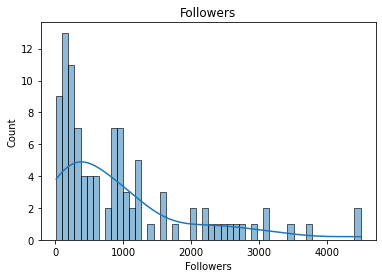

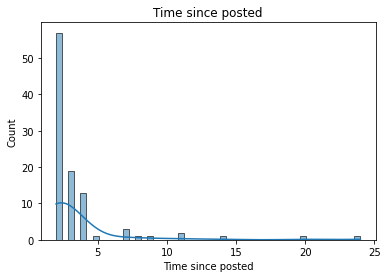

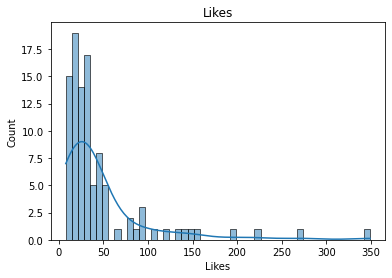

In [19]:
data = dataset.copy()
for feature in numerical_features:
    sns.histplot(data[feature], bins=50, kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

- All Numerical features are right-skewed.
- Most of the users have followers between the range of 0 - 400.
- Most of the users have likes between the range of 0 - 50.

### Categorical Feature

In [20]:
categorical_feature = []
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categorical_feature.append(i)

print(categorical_feature)

['USERNAME', 'Caption', 'Hashtags']


### Analysing Categorical Feature.

In [21]:
dataset[categorical_feature].head()      # Top 5 records of the categorical feature

,USERNAME,Caption,Hashtags
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,#MachineLearning #AI #DataAnalytics #DataScien...
1,drgorillapaints,We all know where it’s going. We just have to ...,#deck .#mac #macintosh#sayhello #apple #steve...
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,#whoiswho #aitrading #ai #aitradingteam#instat...
3,opensourcedworkplace,sfad,#iot #cre#workplace #CDO #bigdata #technology#...
4,crea.vision,Ever missed a call while your phone was chargi...,#instamachinelearning #instabigdata#instamarke...


In [22]:
dataset['USERNAME'].unique()   # Checking Unique name in USERNAME column

array(['mikequindazzi', 'drgorillapaints', 'aitrading_official',
       'opensourcedworkplace', 'crea.vision', 'be.masterly',
       'lenovoworkstations', 'kirellb', 'ethicsandai',
       'diworksolucionesdeti', 'databowl', 'edwisor_india', 'ubiqum',
       'artificialintelligence.a.i', 'ansonmccade', 'jennifercodes',
       'eligible.api', 'ale_borba', 'amjstaffing', 'writtorg',
       'superdatascience', 'xotivtechnologies', 'onthetopsearch',
       'data_enthusiast', 'programmer.io', 'coding.is.life', 'theminest_',
       'philosophercoin', 'greenhousegroup', 'neondistrictrpg',
       'blocsidesports', 'cryptocrackhead', 'gsmusicgroupllc',
       'iotatokennews', 'bitpainting', '_linda_smith567', 'litebit.eu',
       'meganbloemsma', 'ricmiqads', 'hollympeck', 'artificial_quotes',
       'interwall', 'entrancegmbh', 'usccareercenter', '_ehab.othman_',
       'anki7singh', 'mbnsolutions', 'triatebr', 'orcan_intel',
       'funnelaico', 'iamalexleyva', 'astrokpj', 'big.data.hush',
   

In [23]:
len(dataset['USERNAME'].unique())   # Checking length of the Unique name in USERNAME column

95

In [24]:
len(dataset['Caption'].unique())   # Checking Unique value in Caption column

95

In [25]:
len(dataset['Hashtags'].unique())   # Checking Unique value in Hashtags column

98

In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
def generate_wordcloud(data):
    text = " ".join(str(i) for i in dataset[data] if isinstance(i, str))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

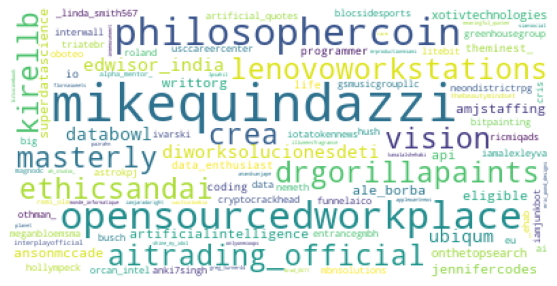

In [28]:
generate_wordcloud('USERNAME')

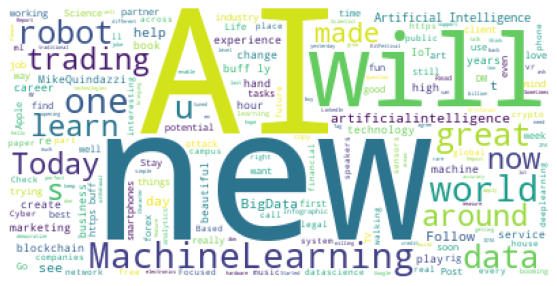

In [29]:
generate_wordcloud('Caption')

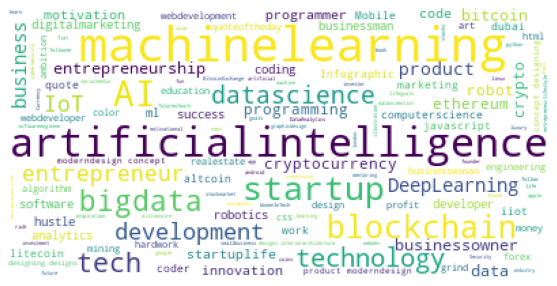

In [30]:
generate_wordcloud('Hashtags')

<Axes: >

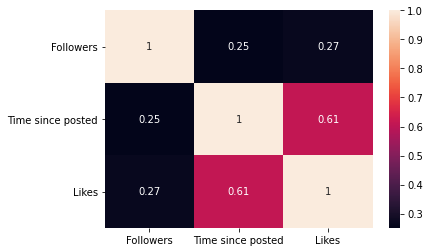

In [31]:
sns.heatmap(dataset[numerical_features].corr(),annot=True)

-Their is correlation between Time and Likes.

- Now we will check relation between all the numerical feature with target feature.

<Axes: title={'center': 'Followers vs Likes'}, xlabel='Followers', ylabel='Likes'>

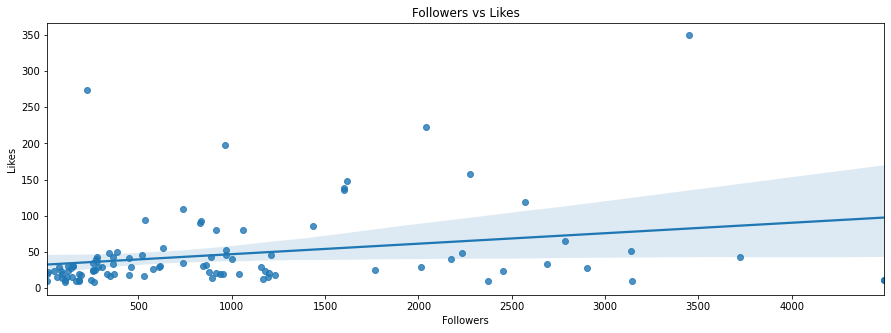

In [32]:
plt.figure(figsize= (15, 5))
plt.title('Followers vs Likes')
sns.regplot(x = 'Followers', y = 'Likes', data = dataset)

- There is linear relationship between Followers and Likes.

<Axes: title={'center': 'Time since posted vs Likes'}, xlabel='Time since posted', ylabel='Likes'>

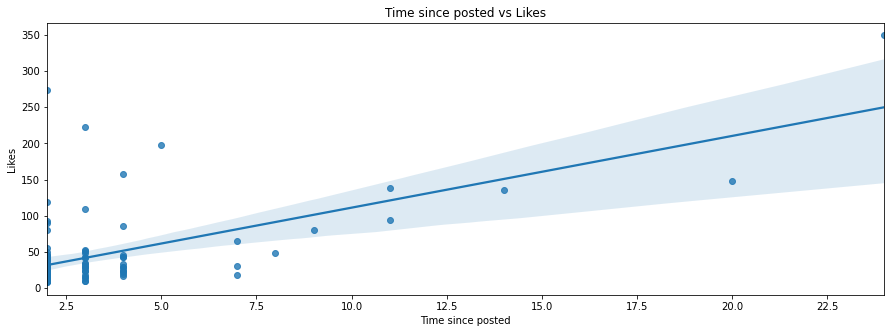

In [33]:
plt.figure(figsize= (15, 5))
plt.title('Time since posted vs Likes')
sns.regplot(x = 'Time since posted', y = 'Likes', data = dataset)

- There is linear relationship between Time since posted and Likes.

In [34]:
dataset.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [35]:
# Splitting dataset into Independent and Dependent variable

X = dataset[['Followers','Time since posted']]    # Independent Variable
y = dataset['Likes']      # Depdependent Variable

In [36]:
X

,Followers,Time since posted
0,1600,11
1,880,2
2,255,2
3,340,3
4,304,3
...,...,...
95,614,3
96,450,3
97,182,3
98,2039,3


In [37]:
y

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 100, dtype: int64

In [38]:
# Splitting data into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7)

In [39]:
X_train.head()

,Followers,Time since posted
65,2014,2
54,2785,7
27,1618,20
58,918,2
33,610,2


In [40]:
X_test.head()

,Followers,Time since posted
37,124,2
26,265,2
78,246,2
91,971,2
49,935,4


In [41]:
y_train

65     29
54     65
27    148
58     21
33     30
     ... 
83     14
67     41
25     46
68     19
47     51
Name: Likes, Length: 70, dtype: int64

In [42]:
y_test

37     24
26     25
78     12
91     46
49     20
15     53
93     20
71     50
86     43
22     20
13     94
40     24
52     17
12     80
88     29
45     31
11     48
66     31
20    198
18     30
50     25
2      25
17     46
85     24
5      18
97     10
51    157
30     90
74     35
96     42
Name: Likes, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
numerical_features.pop()

'Likes'

In [45]:
numerical_features

['Followers', 'Time since posted']

In [46]:
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

In [47]:
X_test_scaled = scaler.transform(X_test[numerical_features])

- LinearRegression

In [48]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state = 7)
score = cross_val_score(lr_model, X_test_scaled, y_test, scoring='neg_mean_absolute_error', cv=cv)
print('MAE',score.mean())

MAE -26.26121975050179


In [50]:
lr_test = np.array([[880, 2]])
lr_model.predict(lr_test)

array([5636.36805375])

- SVR

In [51]:
from sklearn.svm import SVR

In [52]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

SVR()

In [53]:
cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state = 7)
score = cross_val_score(svr_model, X_test_scaled, y_test, scoring='neg_mean_absolute_error', cv=cv)
print('MAE',score.mean())

MAE -24.69265611292408


In [54]:
svr_test = np.array([[1600, 11]])
svr_model.predict(svr_test)

array([31.24609231])